##판매량이 급격히 늘어났거나 급격히 줄어든 브랜드에 대하여 해당 브랜드의 언급량의 증감을 확인

In [1]:
import pandas as pd

In [46]:
# brand_keyword_cnt.csv 파일을 불러옴
df_brand_keyword = pd.read_csv('brand_keyword_cnt.csv')

# 다른 데이터 파일들을 불러옴 (train.csv, sales.csv, product_info.csv 등)
df_train = pd.read_csv('train.csv')
df_sales = pd.read_csv('sales.csv')
df_product_info = pd.read_csv('product_info.csv')

In [60]:
df_train.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_brand_keyword.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-00001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B002-00002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
B002-00002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B002-00002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B002-00003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


브랜드 별 총 판매량의 증감을 확인

In [79]:
df_brand_train = df_train.drop(columns=['ID','제품','대분류','중분류','소분류'])
df_brand_keyword = df_brand_train.set_index('브랜드')
df_brand_keyword = df_brand_keyword.groupby('브랜드').sum()

# 각 열의 값에서 이전 행의 값 빼기
df_diff = df_brand_keyword.diff()

# 변동이 10 이상인 행 찾기
df_large_diff = df_diff[abs(df_diff) > 10]
df_large_diff = df_large_diff.dropna(how='all')
print(len(df_large_diff))

2983


In [80]:
# null이 아닌 행만 포함하는 새로운 데이터프레임 생성
df_non_null = df_large_diff.dropna(how='any')
df_col_non_null = df_large_diff.dropna(how='any',axis = 1)

# null이 아닌 행의 개수 출력
num_non_null_rows = df_non_null.shape[0]
print("Null이 아닌 행의 개수:", num_non_null_rows)

# null이 아닌 행의 개수 출력
num_col_non_null_rows = df_col_non_null.shape[0]
print("Null이 아닌 행의 개수:", num_col_non_null_rows)


Null이 아닌 행의 개수: 60
Null이 아닌 행의 개수: 2983


In [81]:
df_large_diff.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B002-00003,NaN,NaN,NaN,22.0,37.0,39.0,30.0,28.0,23.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
B002-00005,NaN,NaN,NaN,-22.0,-37.0,-39.0,-30.0,-28.0,-23.0,-19.0,...,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN
B002-00006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-26.0,NaN,NaN,NaN,NaN,NaN
B002-00007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_brand_keyword.head()

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
브랜드,,,,,,,,,,,,,,,,,,,,,
B002-00001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B002-00002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
B002-00003,0,0,0,22,37,39,30,28,23,19,...,0,0,0,0,0,0,0,0,0,11
B002-00005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,0,10,0,0,1
B002-00006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
brand_sales_corr = pd.DataFrame()

for col in df_large_diff.columns:
    if col not in df_brand_keyword.columns:
        print(f"{col} 열은 df_brand_keyword 데이터프레임에 없습니다.")
        continue
    correlation = df_large_diff[col].corr(df_brand_keyword[col])
    print(f"{col} 상관계수: {correlation}")
    brand_sales_corr.loc[col, 'Correlation'] = correlation

print(brand_sales_corr)


2022-01-01 상관계수: 0.7157252501134391
2022-01-02 상관계수: 0.7154479579570054
2022-01-03 상관계수: 0.7178030082877422
2022-01-04 상관계수: 0.7166991787508433
2022-01-05 상관계수: 0.7185489026688042
2022-01-06 상관계수: 0.7181510599422699
2022-01-07 상관계수: 0.7179409712882937
2022-01-08 상관계수: 0.7126874782640209
2022-01-09 상관계수: 0.7124829108477854
2022-01-10 상관계수: 0.7123023847117961
2022-01-11 상관계수: 0.7191831255696822
2022-01-12 상관계수: 0.719530832217602
2022-01-13 상관계수: 0.718703330459756
2022-01-14 상관계수: 0.7162184489606571
2022-01-15 상관계수: 0.7156353792149395
2022-01-16 상관계수: 0.7154885363315046
2022-01-17 상관계수: 0.715817603680866
2022-01-18 상관계수: 0.7146090502600435
2022-01-19 상관계수: 0.7142825184678168
2022-01-20 상관계수: 0.7155006803925915
2022-01-21 상관계수: 0.7158317884962714
2022-01-22 상관계수: 0.7109165546717441
2022-01-23 상관계수: 0.7108217147815916
2022-01-24 상관계수: 0.7107643405590043
2022-01-25 상관계수: 0.715814719408547
2022-01-26 상관계수: 0.7164691627988273
2022-01-27 상관계수: 0.710990154935819
2022-01-28 상관계수: 0.71063900888036

In [76]:
brand_sales_corr.head()

,Correlation
2022-01-01,0.000861
2022-01-02,0.000739
2022-01-03,0.000584
2022-01-04,0.000580
2022-01-05,0.001056


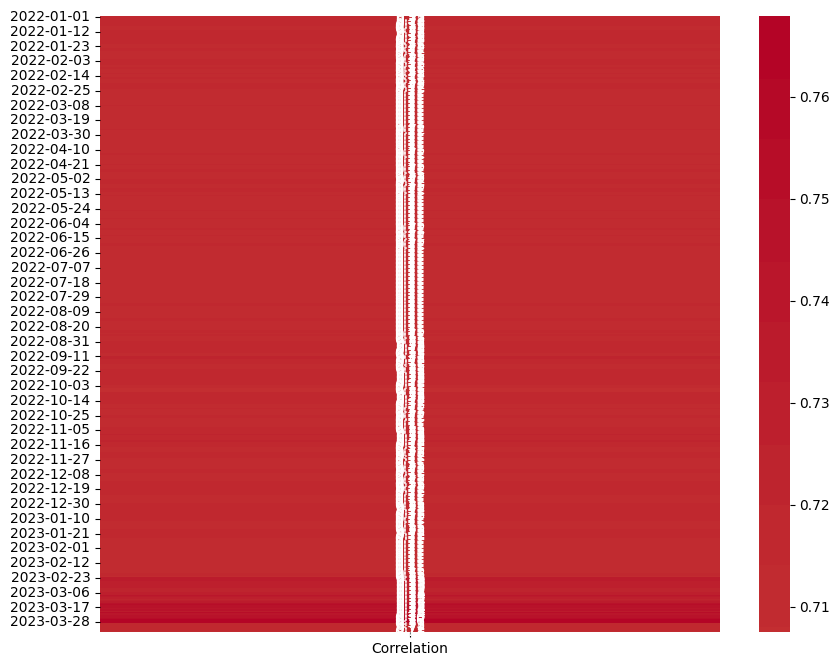

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(brand_sales_corr, annot=True, cmap='coolwarm', center=0)
plt.show()


브랜드별 총 판매량의 증감이 브랜드별 키워드 언급량과 높은 관계가 있음을 볼수있다.